Python Version

In [1]:
import sys
print(sys.version)

3.6.9 (default, Dec  8 2021, 21:08:43) 
[GCC 8.4.0]


Sum

In [2]:
i = 3+1
print(i)

4


Widgets

In [16]:
import ipywidgets as widgets
from IPython import display

Opencv

<PIL.Image.Image image mode=RGB size=160x120 at 0x7F56271B38>
<PIL.Image.Image image mode=RGB size=80x60 at 0x7F56271B70>


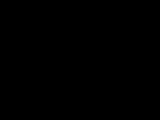

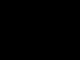

In [14]:
import cv2 as cv
import numpy as np
from IPython import display
import PIL.Image

img_1 = np.zeros((120,160,3), dtype=np.uint8)

img_2 = np.zeros((60,80,3), dtype=np.uint8)

img_1 = PIL.Image.fromarray(img_1)
img_2 = PIL.Image.fromarray(img_2)

print(img_1)
print(img_2)

display.display(img_1,img_2)

Pytorch

In [4]:
import torch

Torchvision

In [5]:
import torchvision